## Import the module

In [1]:
import es_parser as esp
import matplotlib.pyplot as plt

## Create a parser object from esp

In [2]:
#Specify DOSCAR, band's EIGENVAL and KPOINTS file paths
dos      = "./example/DOSCAR"
eigenval = "./example/EIGENVAL"
kpoint   = "./example/KPOINTS"

parser = esp.ElectronicStatesParser(dos, eigenval)

## Getting the DOS
The parse_dos method have two return values, the total DOS and the partial DOS.

In [3]:
#Just the total DOS
totalDOS = parser.parse_dos(shift_to_fermi = True)[0]
print(totalDOS.keys())

dict_keys(['energy', 'dos_up', 'dos_down', 'intdos_up', 'intdos_down'])


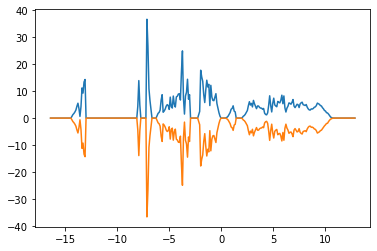

In [4]:
plt.plot(totalDOS['energy'], totalDOS['dos_up'])
plt.plot(totalDOS['energy'], totalDOS['dos_down'])
plt.show()

In [5]:
#Getting the partial DOS of the first atom in POSCAR

totalDOS, partialDOS = parser.parse_dos(pdos_flag = True, natom = [1])

print(partialDOS.keys())
print(partialDOS['atom_1'].keys())

dict_keys(['atom_1'])
dict_keys(['energy', 's_up', 's_down', 'py_up', 'py_down', 'pz_up', 'pz_down', 'px_up', 'px_down', 'dxy_up', 'dxy_down', 'dyz_up', 'dyz_down', 'dz2r2_up', 'dz2r2_down', 'dxz_up', 'dxz_down', 'dx2y2_up', 'dx2y2_down'])


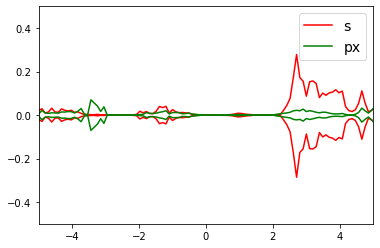

In [6]:
plt.plot(partialDOS['atom_1']['energy'], partialDOS['atom_1']['s_up'], color = 'red', label = "s")
plt.plot(partialDOS['atom_1']['energy'], partialDOS['atom_1']['s_down'], color = 'red')

plt.plot(partialDOS['atom_1']['energy'], partialDOS['atom_1']['px_up'], color = 'green', label = "px")
plt.plot(partialDOS['atom_1']['energy'], partialDOS['atom_1']['px_down'], color = 'green')

plt.axis([-5, 5, -0.5, 0.5])
plt.legend(fontsize = 14)
plt.show()

## Getting and plotting the band structure

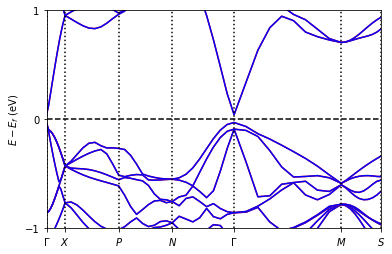

In [7]:
bands = parser.parse_band()
parser.plot_band(bands, kpoints_file=kpoint)
plt.ylim(ymin = -1, ymax = 1)
plt.show()